In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

# AUSTRALIA RAINFALL

## Definir objetivo

Los nombres de las variables y su descripción son las siguientes:
    - **date** - Today's date.
    - **location** - Location in Australia where the weather observations were collected.
    - **min_temp** - Minimum temperature in the 24 hours to 9am (in degrees Celsius).
    - **max_temp** - Maximum temperature in the 24 hours from 9am (in degrees Celsius).
    - **rainfall** - Precipitation (rainfall) in the 24 hours to 9am (in millimetres).
    - **evaporation** - Evaporation in the 24 hours to 9am (in millimetres).
    - **sunshine** - Bright sunshine in the 24 hours to midnight (in hours).
    - **wind_gust_dir** - Direction of strongest gust in the 24 hours to midnight (in compass points).
    - **wind_gust_speed** - Speed of strongest wind gust in the 24 hours to midnight (in kilometres per hour).
    - **wind_dir_9am** - Wind direction averaged over 10 minutes prior to 9 am (in compass points).
    - **wind_dir_3pm** - Wind direction averaged over 10 minutes prior to 3 pm (in compass points).
    - **wind_speed_9am** - Wind speed averaged over 10 minutes prior to 9 am (in kilometres per hour).
    - **wind_speed_3pm** - Wind speed averaged over 10 minutes prior to 3 pm (in kilometres per hour).
    - **humidity_9am** - Relative humidity at 9 am (in percentage).
    - **humidity_3pm** - Relative humidity at 3 pm (in percentage).
    - **pressure_9am** - Atmospheric pressure reduced to mean sea level at 9 am (in hectopascals).
    - **pressure_3pm** - Atmospheric pressure reduced to mean sea level at 3 pm (in hectopascals)
    - **cloud_9am** - Fraction of sky obscured by cloud at 9 am (in eighths).
    - **cloud_3pm** - Fraction of sky obscured by cloud at 3 pm (in eighths).
    - **temp_9am** - Temperature at 9 am (in degrees Celsius).
    - **temp_3pm** - Temperature at 3 pm (in degrees Celsius).
    - **rain_today** - Whether rain has fallen today (0=No, 1=Yes).
    - **RISK_MM** : Risk of precipitation (rainfall) in the next 24 hours to 9am (in millimetres).
    - **rain_tomorrow** - Whether it will rain the next day (0=No, 1=Yes)
Australia ha tenido en este ultimo tiempo muchos incendios en diferentes partes del pais. Mi objetivo es poder predecir si al dia siguiente va a llover, ya que se debe tener en cuenta y asi por ejemplo estar mas alerta en los casos donde no esta lloviendo desde hace mucho tiempo.

## Definir Hipotesis

Las variables independientes son las siguientes: MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Cloud9am','Cloud3pm'.
La variable dependiente, es decir nuestro objetivo a predecir es 'RainTomorrow'

Queremos ver que tanta relacion existe entre la presion atmosferica y la prediccion de la lluvia. Es decir, si se puede encontrar una correlacion entre ellas

## Explicar transformacion del dataset

En un principio, voy a ver si existen duplicados, luego voy a tratar los nulos para cada variable con su respectiva manera y su razonamiento. Cuando ya no hayan mas nulos, comienza el mirar para las variables categoricas que tipo de distribucion es y si existen outliers para escalar cada una de ellas. Para las variables categoricas, realizo el encoding. Luego de todos esos pasos, puede comenzar el modelado.

La finalidad de esto, es poder tener un modelo, que sea confiable para poder predecir, ya que es importante la manera de tratar los nulos por ejemplo.

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df = df.copy()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


## Analisis basico

In [3]:
print(f"El dataset completo tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset completo tiene 142193 filas y 24 columnas


In [4]:
print(f"Los estadisticos de cada columna del dataset de la region NSW son los siguientes: \n{df.describe().round(2)}")

Los estadisticos de cada columna del dataset de la region NSW son los siguientes: 
         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.00  141871.00  140787.00     81350.00  74377.00      132923.00   
mean       12.19      23.23       2.35         5.47      7.62          39.98   
std         6.40       7.12       8.47         4.19      3.78          13.59   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.90          31.00   
50%        12.00      22.60       0.00         4.80      8.50          39.00   
75%        16.80      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     140845.00     139563.00    140419.00    138583.00    128179.00   
mean          14.00         18.64        68.

In [5]:
print(f"El tipo de dato de las variables son las siguientes: \n{df.dtypes}")

El tipo de dato de las variables son las siguientes: 
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object


La fecha debe estar en formato date

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [8]:
df = df.drop(columns = ["Date"])

In [9]:
df = df.drop(columns = ['WindGustSpeed',"WindGustDir","WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm"])

Considero que el viento y su direccion no hace variar a mi objetivo( Saber si llovio o no)

<AxesSubplot:xlabel='Year'>

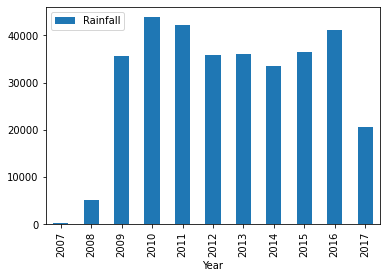

In [10]:
df[["Year","Rainfall"]].groupby("Year").sum().plot(kind="bar")

In [11]:
print("Si llueve hoy, cuanto se predice que llueve mañana")
df.groupby("RainToday").agg(
    llueve_mañana =  ('RainTomorrow', 'count'))

Si llueve hoy, cuanto se predice que llueve mañana


,llueve_mañana
RainToday,
No,109332
Yes,31455


En general, no llueve si en ese dia llovió.

<AxesSubplot:>

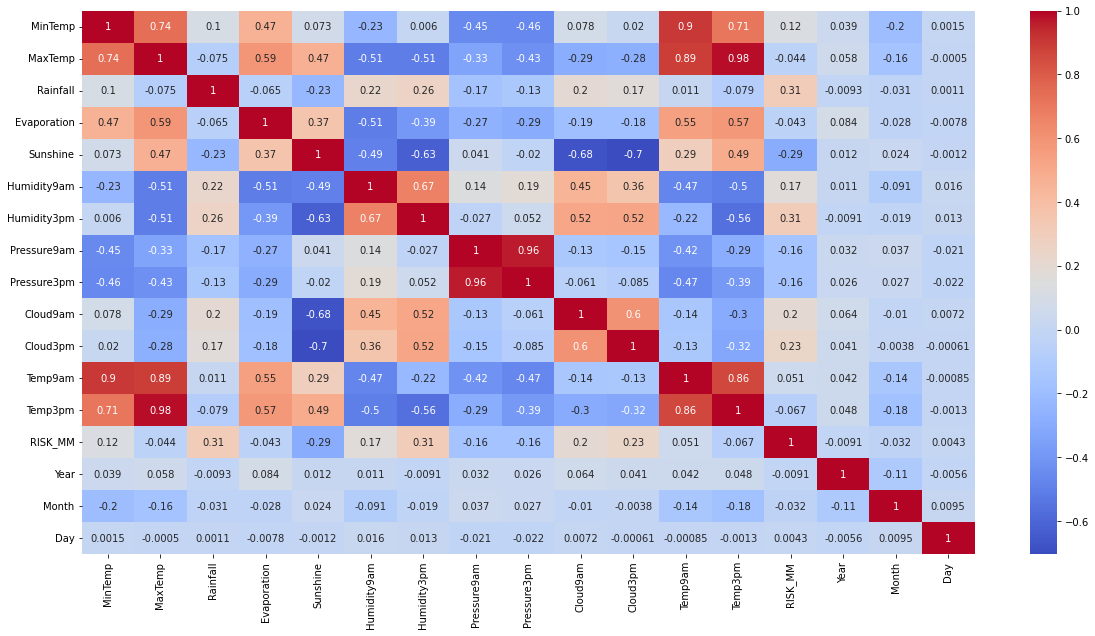

In [12]:
rcParams['figure.figsize'] = 20,10
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [13]:
print(f"Tenemos {df.duplicated().sum()} filas duplicadas")

Tenemos 0 filas duplicadas


como no hay duplicados, no se debe realizar nada

## Faltantes de datos y su tratamiento por variable

In [14]:
print("Porcentaje de nulos por variable en el archivo")
d =round(df.isnull().sum().sort_values(ascending=False)/len(df),3)
d

Porcentaje de nulos por variable en el archivo


Sunshine        0.477
Evaporation     0.428
Cloud3pm        0.402
Cloud9am        0.377
Pressure9am     0.099
Pressure3pm     0.098
Humidity3pm     0.025
Temp3pm         0.019
Humidity9am     0.012
Rainfall        0.010
RainToday       0.010
Temp9am         0.006
MinTemp         0.004
MaxTemp         0.002
Year            0.000
Month           0.000
Location        0.000
RainTomorrow    0.000
RISK_MM         0.000
Day             0.000
dtype: float64

### Evaporation
Como un 59% de los datos son nulos, elimino la columna porque no aporta nada al analisis

In [15]:
df = df.drop(columns = ["Evaporation"])

### Cloud3pm y Cloud9am  --> CREADO Cloud_day

In [16]:
df["Cloud3pm"].value_counts(dropna=False)

NaN    57094
7.0    18052
1.0    14827
8.0    12407
6.0     8869
2.0     7153
3.0     6836
5.0     6743
4.0     5254
0.0     4957
9.0        1
Name: Cloud3pm, dtype: int64

In [17]:
df["Cloud9am"].value_counts(dropna=False)

NaN    53657
7.0    19749
1.0    15558
8.0    14389
0.0     8587
6.0     8072
2.0     6442
3.0     5854
5.0     5510
4.0     4373
9.0        2
Name: Cloud9am, dtype: int64

In [18]:
var1 = "Cloud9am"
var2 = "Cloud3pm"
print(f"Tenemos datos faltantes en las dos columnas, {var1} y {var2}. Si hay faltantes en una, se completa con la que tiene el dato.")
df[var1].fillna(df[var2], inplace = True)
df[var2].fillna(df[var1], inplace = True)

print(f"Ahora los nulos en la columna {var1} son {df[var1].isna().sum()} y en la columna {var2} son {df[var1].isna().sum()}.")

Tenemos datos faltantes en las dos columnas, Cloud9am y Cloud3pm. Si hay faltantes en una, se completa con la que tiene el dato.
Ahora los nulos en la columna Cloud9am son 49677 y en la columna Cloud3pm son 49677.


In [19]:
print("Creamos una nueva columna donde unimos los datos de cada horario haciendo un promedio del dia")
df["Cloud_day"] = (df["Cloud9am"] + df["Cloud3pm"])/2
print(f"La cantidad de nulos que tiene la colummna Cloud_day es de: {df['Cloud_day'].isna().sum()}")

Creamos una nueva columna donde unimos los datos de cada horario haciendo un promedio del dia
La cantidad de nulos que tiene la colummna Cloud_day es de: 49677


In [20]:
df = df.drop(columns = ['Cloud3pm',"Cloud9am"])
print("Eliminamos las columnas Cloud3pm y Cloud9am")

Eliminamos las columnas Cloud3pm y Cloud9am


In [21]:
df.dropna(subset=["Cloud_day"],axis=0, inplace=True)
print("Eliminimos las filas que tienen Nulos de la variable 'Cloud_day'")

Eliminimos las filas que tienen Nulos de la variable 'Cloud_day'


### Pressure9am y Pressure3pm --> CREADO Pressure_day

In [22]:
df["Pressure9am"].fillna(df["Pressure3pm"], inplace = True)
df["Pressure3pm"].fillna(df["Pressure9am"], inplace = True)

In [23]:
print("Creamos una nueva columna donde unimos los datos de cada horario haciendo un promedio del dia.")
df["Pressure_day"] = (df["Pressure9am"] + df["Pressure3pm"])/2

Creamos una nueva columna donde unimos los datos de cada horario haciendo un promedio del dia.


In [24]:
df["Pressure_day"].value_counts(dropna=False)

NaN        3857
1016.25     289
1017.25     281
1016.05     278
1017.50     276
           ... 
997.10        1
989.35        1
989.95        1
1034.20       1
992.60        1
Name: Pressure_day, Length: 1361, dtype: int64

In [25]:
df.shape

(92516, 19)

In [26]:
df.dropna(subset=["Pressure_day"],axis=0, inplace=True)

In [27]:
df.isnull().sum().sort_values(ascending=False)

Sunshine        21744
Humidity3pm      1699
Temp3pm          1437
Rainfall          480
RainToday         480
Humidity9am       385
Temp9am           148
MinTemp           121
MaxTemp            91
Year                0
Cloud_day           0
Day                 0
Month               0
Location            0
RainTomorrow        0
RISK_MM             0
Pressure3pm         0
Pressure9am         0
Pressure_day        0
dtype: int64

### Rainfall

In [28]:
print(f"Los tipos de datos que hay en la columna son:\n{df.Rainfall.value_counts(dropna=False)}")

Los tipos de datos que hay en la columna son:
0.0      56109
0.2       4935
0.4       2449
0.6       1639
0.8       1300
         ...  
76.4         1
145.0        1
113.0        1
94.0         1
69.0         1
Name: Rainfall, Length: 616, dtype: int64


In [29]:
var = 'Rainfall'
print(f"Ahora La cantidad de nulos de la columna es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna es de 480 filas y como son pocos, este puede ser reemplazado por la mediana.


In [30]:
print("Ahora, la cantidad de nulos es de", df[var].isnull().sum())

Ahora, la cantidad de nulos es de 0


### RainToday

In [31]:
print(f"Sabiendo que RainToday tiene nulos, observamos los tipos de datos que hay en la columna son:\n{df.RainToday.value_counts(dropna=False)}\nVoy a reemplazar los nulos con el dato mas frequente en la columna, es decir, no lluvió")

Sabiendo que RainToday tiene nulos, observamos los tipos de datos que hay en la columna son:
No     67735
Yes    20444
NaN      480
Name: RainToday, dtype: int64
Voy a reemplazar los nulos con el dato mas frequente en la columna, es decir, no lluvió


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

var = 'RainToday'
imputer.fit(df[[var]])
df[var] = imputer.transform(df[[var]])

In [33]:
print(f"Ahora hay {df[var].value_counts(dropna=False)[0]} de No y {df[var].value_counts(dropna=False)[1]} de Yes")
print(f"Ahora los nulos son {df[var].isna().sum()}")

Ahora hay 68215 de No y 20444 de Yes
Ahora los nulos son 0


Paso a numero entero los datos de la columna "RainToday"

### Humidity9am y Humidity3pm --> CREADO Humidity_day

In [34]:
print("Tenemos datos faltantes en las dos columnas, Temp9am y Temp3pm. Si hay faltantes en una, se completa con la que tiene el dato.")
df["Humidity9am"].fillna(df["Humidity3pm"], inplace = True)
df["Humidity3pm"].fillna(df["Humidity9am"], inplace = True)

Tenemos datos faltantes en las dos columnas, Temp9am y Temp3pm. Si hay faltantes en una, se completa con la que tiene el dato.


In [35]:
var = 'Humidity3pm'
print(f"Ahora La cantidad de nulos de la columna es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna es de 157 filas y como son pocos, este puede ser reemplazado por la mediana.


In [36]:
var = 'Humidity9am'
print(f"Ahora La cantidad de nulos de la columna es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna es de 157 filas y como son pocos, este puede ser reemplazado por la mediana.


In [37]:
df["Humidity_day"] = (df["Humidity9am"] + df["Humidity3pm"])/2

In [38]:
df.isnull().sum().sort_values(ascending=False)

Sunshine        21744
Temp3pm          1437
Temp9am           148
MinTemp           121
MaxTemp            91
RISK_MM             0
Pressure_day        0
Cloud_day           0
Day                 0
Month               0
Year                0
RainTomorrow        0
Location            0
RainToday           0
Pressure3pm         0
Pressure9am         0
Humidity3pm         0
Humidity9am         0
Rainfall            0
Humidity_day        0
dtype: int64

### Temp9am y Temp3pm --> CREADO Temp_day

In [39]:
df["Temp9am"].value_counts(dropna=False)

 17.0    565
 14.8    525
 13.8    522
 15.0    518
 16.0    511
        ... 
-0.6       1
 36.9      1
-1.2       1
-1.3       1
 38.0      1
Name: Temp9am, Length: 393, dtype: int64

In [40]:
df["Temp3pm"].value_counts(dropna=False)

NaN     1437
20.0     527
19.0     521
18.5     515
17.8     514
        ... 
3.2        1
4.9        1
3.7        1
46.7       1
45.0       1
Name: Temp3pm, Length: 412, dtype: int64

In [41]:
print("Tenemos datos faltantes en las dos columnas, Temp9am y Temp3pm. Si hay faltantes en una, se completa con la que tiene el dato.")
df["Temp9am"].fillna(df["Temp3pm"], inplace = True)
df["Temp3pm"].fillna(df["Temp9am"], inplace = True)

#ver si esto esta bien porque puede variar mucho la temperatura

Tenemos datos faltantes en las dos columnas, Temp9am y Temp3pm. Si hay faltantes en una, se completa con la que tiene el dato.


In [42]:
df["Temp_day"] = (df["Temp9am"] + df["Temp3pm"])/2

In [43]:
var = 'Temp9am'
print(f"Ahora La cantidad de nulos de la columna {var} es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna Temp9am es de 15 filas y como son pocos, este puede ser reemplazado por la mediana.


In [44]:
var = 'Temp3pm'
print(f"Ahora La cantidad de nulos de la columna {var}es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna Temp3pmes de 15 filas y como son pocos, este puede ser reemplazado por la mediana.


In [45]:
var = 'Temp_day'
print(f"Ahora La cantidad de nulos de la columna {var} es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna Temp_day es de 15 filas y como son pocos, este puede ser reemplazado por la mediana.


In [46]:
df.isnull().sum().sort_values(ascending=False)

Sunshine        21744
MinTemp           121
MaxTemp            91
Location            0
RISK_MM             0
Humidity_day        0
Pressure_day        0
Cloud_day           0
Day                 0
Month               0
Year                0
RainTomorrow        0
Temp3pm             0
RainToday           0
Temp9am             0
Pressure3pm         0
Pressure9am         0
Humidity3pm         0
Humidity9am         0
Rainfall            0
Temp_day            0
dtype: int64

### MinTemp

In [47]:
print(f"Los tipos de datos que hay en la columna son:\n{df.MinTemp.value_counts(dropna=False)}")

Los tipos de datos que hay en la columna son:
 9.6     534
 12.0    529
 10.2    528
 11.0    528
 13.0    526
        ... 
-8.0       1
-5.5       1
-6.5       1
-6.9       1
 30.2      1
Name: MinTemp, Length: 370, dtype: int64


In [48]:
var = 'MinTemp'
print(f"Ahora La cantidad de nulos de la columna es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna es de 121 filas y como son pocos, este puede ser reemplazado por la mediana.


In [49]:
print(f"Ahora ya no hay mas nulos como se puede observar:\n{df.MinTemp.value_counts(dropna=False)}")

Ahora ya no hay mas nulos como se puede observar:
 12.7    613
 9.6     534
 12.0    529
 10.2    528
 11.0    528
        ... 
-6.6       1
-6.0       1
-5.5       1
-6.1       1
 30.2      1
Name: MinTemp, Length: 369, dtype: int64


### MaxTemp

In [50]:
print(f"Ahora ya no hay mas nulos como se puede observar:\n{df.MinTemp.value_counts(dropna=False)}")

Ahora ya no hay mas nulos como se puede observar:
 12.7    613
 9.6     534
 12.0    529
 10.2    528
 11.0    528
        ... 
-6.6       1
-6.0       1
-5.5       1
-6.1       1
 30.2      1
Name: MinTemp, Length: 369, dtype: int64


In [51]:
var = 'MaxTemp'
print(f"Ahora La cantidad de nulos de la columna es de {df[var].isnull().sum()} filas y como son pocos, este puede ser reemplazado por la mediana.")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(df[[var]])

df[var] = imputer.transform(df[[var]])

Ahora La cantidad de nulos de la columna es de 91 filas y como son pocos, este puede ser reemplazado por la mediana.


In [52]:
df.shape

(88659, 21)

In [53]:
df.isnull().sum().sort_values(ascending=False)

Sunshine        21744
Location            0
RainToday           0
Humidity_day        0
Pressure_day        0
Cloud_day           0
Day                 0
Month               0
Year                0
RainTomorrow        0
RISK_MM             0
Temp3pm             0
MinTemp             0
Temp9am             0
Pressure3pm         0
Pressure9am         0
Humidity3pm         0
Humidity9am         0
Rainfall            0
MaxTemp             0
Temp_day            0
dtype: int64

### Sunshine

In [54]:
print(f"Hay muchos nulos, se elimina la columna")

Hay muchos nulos, se elimina la columna


In [55]:
df = df.drop(columns = ['Sunshine'])

In [56]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month', 'Day',
       'Cloud_day', 'Pressure_day', 'Humidity_day', 'Temp_day'],
      dtype='object')

In [57]:
df.isnull().sum().sort_values(ascending=False)

Location        0
MinTemp         0
Humidity_day    0
Pressure_day    0
Cloud_day       0
Day             0
Month           0
Year            0
RainTomorrow    0
RISK_MM         0
RainToday       0
Temp3pm         0
Temp9am         0
Pressure3pm     0
Pressure9am     0
Humidity3pm     0
Humidity9am     0
Rainfall        0
MaxTemp         0
Temp_day        0
dtype: int64

## Escalado y distribuciones

In [58]:
print("Antes de plotear y analizar distribuciones es necesario saber a que variables debemos hacerlo ya que solo se realiza a variables numericas.")

numericas = df.select_dtypes(exclude=['object']).columns
print("Hacer un escalado a la variables:")
for variable in numericas:
    print(f"\t -{variable}")

Antes de plotear y analizar distribuciones es necesario saber a que variables debemos hacerlo ya que solo se realiza a variables numericas.
Hacer un escalado a la variables:
	 -MinTemp
	 -MaxTemp
	 -Rainfall
	 -Humidity9am
	 -Humidity3pm
	 -Pressure9am
	 -Pressure3pm
	 -Temp9am
	 -Temp3pm
	 -RISK_MM
	 -Year
	 -Month
	 -Day
	 -Cloud_day
	 -Pressure_day
	 -Humidity_day
	 -Temp_day


No es necesario hacer la distribucion de Year, Month, Day, Date

### MinTemp

In [59]:
variable = 'MinTemp'
print('Maximo de la temperatura minima: ', df[variable].max())
print('Mediana de la temperatura minima: ', df[variable].median())
print('Promedio de la temperatura minima: ', round(df[variable].mean(),3))
print('Minimo de la temperatura minima: ', df[variable].min())

Maximo de la temperatura minima:  31.4
Mediana de la temperatura minima:  12.7
Promedio de la temperatura minima:  12.921
Minimo de la temperatura minima:  -8.0


<AxesSubplot:title={'center':'Boxplot de MinTemp'}, xlabel='MinTemp'>

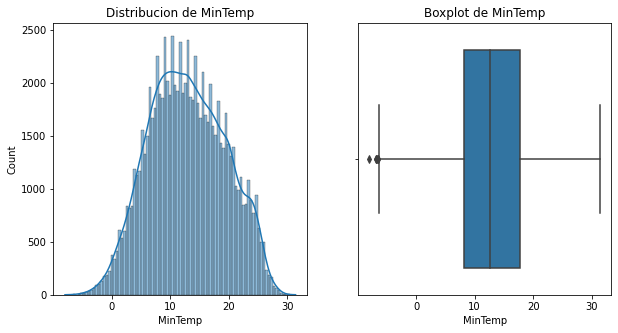

In [60]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [61]:
print(f"Como los datos de {variable} no se distribuyen de manera normal se utiliza MinMaxScaler")
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

df[variable]= minmaxscaler.fit_transform(df[[variable]])

df.head()

Como los datos de MinTemp no se distribuyen de manera normal se utiliza MinMaxScaler


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No,2008,12,1,8.0,1007.40,46.5,19.35
2,Albury,0.530457,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No,2008,12,3,2.0,1008.15,34.0,22.10
4,Albury,0.647208,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No,2008,12,5,7.5,1008.40,57.5,23.75
6,Albury,0.565990,25.0,0.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.0,No,2008,12,7,1.0,1008.90,34.0,21.35
11,Albury,0.606599,21.7,2.2,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,15.6,Yes,2008,12,12,8.0,1007.35,90.0,16.45


### MaxTemp

In [62]:
variable = 'MaxTemp'
print('Maximo de la temperatura minima: ', df[variable].max())
print('Mediana de la temperatura minima: ', df[variable].median())
print('Promedio de la temperatura minima: ', round(df[variable].mean(),3))
print('Minimo de la temperatura minima: ', df[variable].min())

Maximo de la temperatura minima:  48.1
Mediana de la temperatura minima:  23.1
Promedio de la temperatura minima:  23.669
Minimo de la temperatura minima:  4.1


<AxesSubplot:title={'center':'Boxplot de MaxTemp'}, xlabel='MaxTemp'>

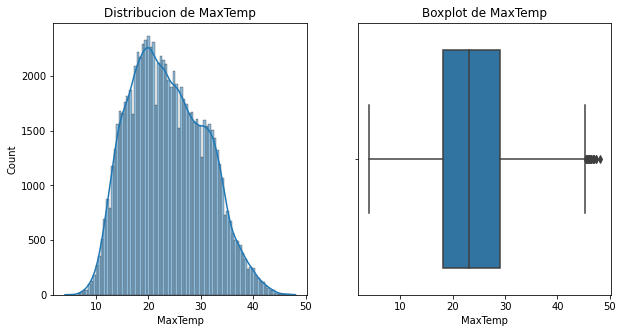

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data=df, x=f"{variable}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot de {variable}")
sns.boxplot(data=df, x=f"{variable}", ax=ax[1])

In [64]:
print(f"Como los datos de {variable} se distribuyen de manera normal y tiene outliers se utiliza RobustScaler")
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df[variable] = rb_scaler.fit_transform(df[[variable]])
df.head()

Como los datos de MaxTemp se distribuyen de manera normal y tiene outliers se utiliza RobustScaler


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No,2008,12,1,8.0,1007.40,46.5,19.35
2,Albury,0.530457,0.238532,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No,2008,12,3,2.0,1008.15,34.0,22.10
4,Albury,0.647208,0.844037,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No,2008,12,5,7.5,1008.40,57.5,23.75
6,Albury,0.565990,0.174312,0.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.0,No,2008,12,7,1.0,1008.90,34.0,21.35
11,Albury,0.606599,-0.128440,2.2,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,15.6,Yes,2008,12,12,8.0,1007.35,90.0,16.45


### Rainfall

In [65]:
variable = 'Rainfall'
print(f'Maximo de {variable}:', df[variable].max())
print(f'Mediana de {variable}:', df[variable].median())
print(f'Promedio de {variable}:', round(df[variable].mean(),3))
print(f'Minimo de {variable}:', df[variable].min())

Maximo de Rainfall: 371.0
Mediana de Rainfall: 0.0
Promedio de Rainfall: 2.494
Minimo de Rainfall: 0.0


Se puede observar como el maximo es muchisimo mas alto que el pormedio y la mediana.

<AxesSubplot:title={'center':'Boxplot de Rainfall'}, xlabel='Rainfall'>

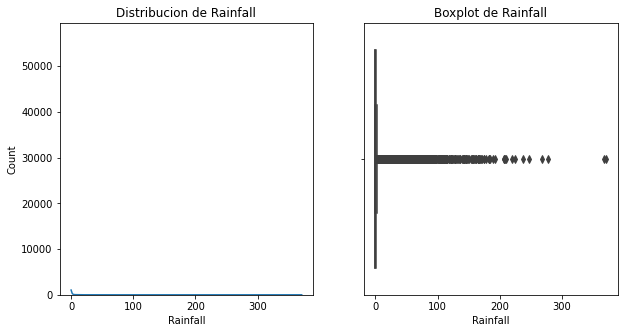

In [66]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

por los outliers no permite ver que tipo de distribucion es, para esto filtro para mirar que tipo de de distribucion tiene

In [67]:
df_filtrado =  df[df["Rainfall"] <2]
df_filtrado.head()

,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No,2008,12,1,8.0,1007.40,46.5,19.35
2,Albury,0.530457,0.238532,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No,2008,12,3,2.0,1008.15,34.0,22.10
4,Albury,0.647208,0.844037,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No,2008,12,5,7.5,1008.40,57.5,23.75
6,Albury,0.565990,0.174312,0.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.0,No,2008,12,7,1.0,1008.90,34.0,21.35
14,Albury,0.451777,0.422018,0.0,50.0,28.0,1013.4,1010.3,17.3,26.2,No,0.0,No,2008,12,16,0.0,1011.85,39.0,21.75


Grafico sin outliers en Rainfall


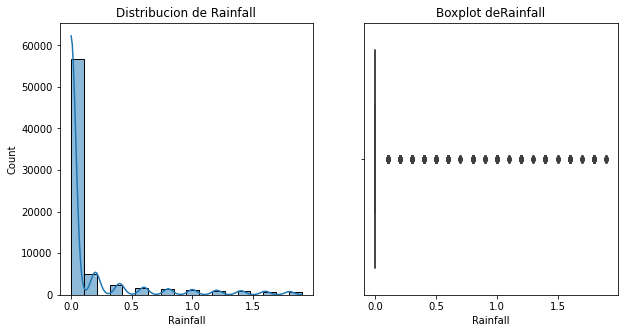

In [68]:
variable = 'Rainfall'
print("Grafico sin outliers en Rainfall")
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df_filtrado, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df_filtrado, x = f"{variable}", ax=ax[1])
plt.show()

In [69]:
print(f"Como los datos de {variable} no se distribuyen de manera normal se utiliza MinMaxScaler")
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

df[variable]= minmaxscaler.fit_transform(df[[variable]])
df.head()

Como los datos de Rainfall no se distribuyen de manera normal se utiliza MinMaxScaler


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No,2008,12,1,8.0,1007.40,46.5,19.35
2,Albury,0.530457,0.238532,0.000000,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No,2008,12,3,2.0,1008.15,34.0,22.10
4,Albury,0.647208,0.844037,0.002695,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No,2008,12,5,7.5,1008.40,57.5,23.75
6,Albury,0.565990,0.174312,0.000000,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.0,No,2008,12,7,1.0,1008.90,34.0,21.35
11,Albury,0.606599,-0.128440,0.005930,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,15.6,Yes,2008,12,12,8.0,1007.35,90.0,16.45


### RISK_MM

In [70]:
variable = 'RISK_MM'
print(f'Maximo de {variable}:', df[variable].max())
print(f'Mediana de {variable}:', round(df[variable].median()))
print(f'Promedio de {variable}:', round(df[variable].mean(),2))
print(f'Minimo de {variable}:', round(df[variable].min()))

Maximo de RISK_MM: 371.0
Mediana de RISK_MM: 0
Promedio de RISK_MM: 2.5
Minimo de RISK_MM: 0


<AxesSubplot:title={'center':'Boxplot deRISK_MM'}, xlabel='RISK_MM'>

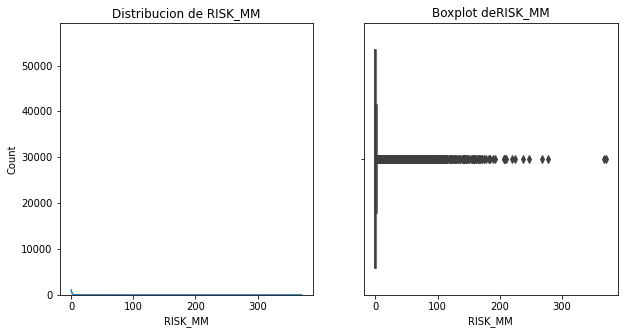

In [71]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

por los outliers no permite ver que tipo de distribucion es, para esto filtro para mirar que tipo de de distribucion tiene

In [72]:
df_filtrado = df[df["RISK_MM"] <5]
df_filtrado.head()

,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No,2008,12,1,8.0,1007.40,46.5,19.35
2,Albury,0.530457,0.238532,0.000000,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No,2008,12,3,2.0,1008.15,34.0,22.10
4,Albury,0.647208,0.844037,0.002695,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No,2008,12,5,7.5,1008.40,57.5,23.75
6,Albury,0.565990,0.174312,0.000000,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.0,No,2008,12,7,1.0,1008.90,34.0,21.35
12,Albury,0.606599,-0.412844,0.042049,76.0,93.0,994.3,993.0,17.4,15.8,Yes,3.6,Yes,2008,12,13,8.0,993.65,84.5,16.60


Grafico sin outliers en RISK_MM


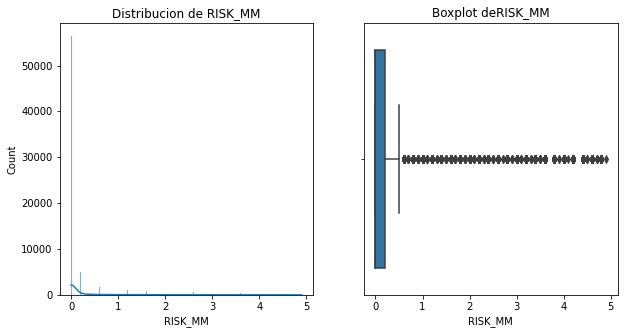

In [73]:
variable = 'RISK_MM'
print("Grafico sin outliers en RISK_MM")
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df_filtrado, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df_filtrado, x = f"{variable}", ax=ax[1])
plt.show()

In [74]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
print(f"Se utiliza MinMaxScaler porque {variable} no es una distribución normal")
df[variable]= minmaxscaler.fit_transform(df[[variable]])
df.head()

Se utiliza MinMaxScaler porque RISK_MM no es una distribución normal


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.000000,No,2008,12,1,8.0,1007.40,46.5,19.35
2,Albury,0.530457,0.238532,0.000000,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.000000,No,2008,12,3,2.0,1008.15,34.0,22.10
4,Albury,0.647208,0.844037,0.002695,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.000539,No,2008,12,5,7.5,1008.40,57.5,23.75
6,Albury,0.565990,0.174312,0.000000,49.0,19.0,1009.6,1008.2,18.1,24.6,No,0.000000,No,2008,12,7,1.0,1008.90,34.0,21.35
11,Albury,0.606599,-0.128440,0.005930,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,0.042049,Yes,2008,12,12,8.0,1007.35,90.0,16.45


### Humidity9am, Humidity3pm y humidity_day

In [75]:
variable1 = 'Humidity9am'
print(f'Maximo de {variable1}:', df[variable1].max())
print(f'Mediana de {variable1}:', df[variable1].median())
print(f'Promedio de {variable1}:', round(df[variable1].mean(),3))
print(f'Minimo de {variable1}:', df[variable1].min())

Maximo de Humidity9am: 100.0
Mediana de Humidity9am: 69.0
Promedio de Humidity9am: 67.839
Minimo de Humidity9am: 0.0


<AxesSubplot:title={'center':'Boxplot de Humidity9am'}, xlabel='Humidity9am'>

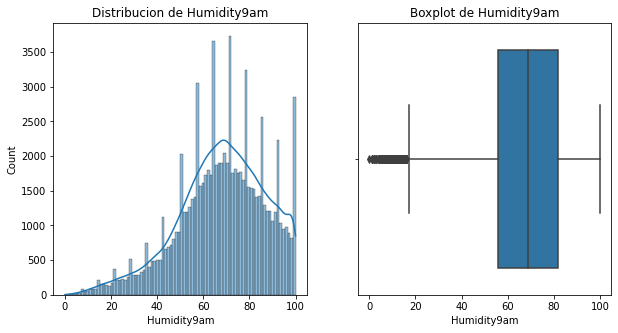

In [76]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable1}")
sns.histplot(data = df, x = f"{variable1}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de {variable1}")
sns.boxplot(data = df, x = f"{variable1}", ax=ax[1])

In [77]:
variable2 = 'Humidity3pm'
print(f'Maximo de {variable2}:', df[variable2].max())
print(f'Mediana de {variable2}:', df[variable2].median())
print(f'Promedio de {variable2}:', round(df[variable2].mean(),4))
print(f'Minimo de {variable2}:', df[variable2].min())

Maximo de Humidity3pm: 100.0
Mediana de Humidity3pm: 52.0
Promedio de Humidity3pm: 51.3329
Minimo de Humidity3pm: 0.0


<AxesSubplot:title={'center':'Boxplot de Humidity3pm'}, xlabel='Humidity3pm'>

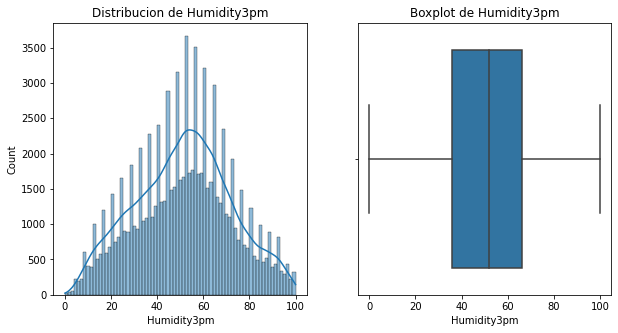

In [78]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable2}")
sns.histplot(data = df, x = f"{variable2}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de {variable2}")
sns.boxplot(data = df, x = f"{variable2}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot deHumidity_day'}, xlabel='Humidity_day'>

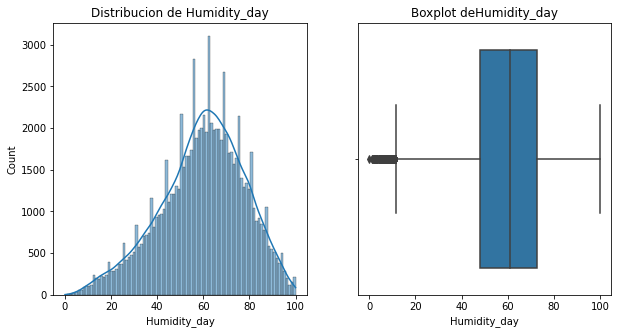

In [79]:
variable3 = "Humidity_day"

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(f"Distribucion de {variable3}")
sns.histplot(data=df, x=f"{variable3}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot de{variable3}")
sns.boxplot(data=df, x=f"{variable3}", ax=ax[1])

In [80]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
print(f"Se utiliza MinMaxScaler porque {variable1} no es una distribución normal")
df[variable1]= minmaxscaler.fit_transform(df[[variable1]])
df.head()

Se utiliza MinMaxScaler porque Humidity9am no es una distribución normal


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,0.71,22.0,1007.7,1007.1,16.9,21.8,No,0.000000,No,2008,12,1,8.0,1007.40,46.5,19.35
2,Albury,0.530457,0.238532,0.000000,0.38,30.0,1007.6,1008.7,21.0,23.2,No,0.000000,No,2008,12,3,2.0,1008.15,34.0,22.10
4,Albury,0.647208,0.844037,0.002695,0.82,33.0,1010.8,1006.0,17.8,29.7,No,0.000539,No,2008,12,5,7.5,1008.40,57.5,23.75
6,Albury,0.565990,0.174312,0.000000,0.49,19.0,1009.6,1008.2,18.1,24.6,No,0.000000,No,2008,12,7,1.0,1008.90,34.0,21.35
11,Albury,0.606599,-0.128440,0.005930,0.89,91.0,1010.5,1004.2,15.9,17.0,Yes,0.042049,Yes,2008,12,12,8.0,1007.35,90.0,16.45


In [81]:
from sklearn.preprocessing import RobustScaler

robustscaler2 = RobustScaler()
variable2 = 'Humidity3pm'
variable3 = "Humidity_day"
df[variable2], df[variable3] =  robustscaler2.fit_transform(df[[variable2,variable3]]).T

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,0.71,-1.000000,1007.7,1007.1,16.9,21.8,No,0.000000,No,2008,12,1,8.0,1007.40,-0.591837,19.35
2,Albury,0.530457,0.238532,0.000000,0.38,-0.733333,1007.6,1008.7,21.0,23.2,No,0.000000,No,2008,12,3,2.0,1008.15,-1.102041,22.10
4,Albury,0.647208,0.844037,0.002695,0.82,-0.633333,1010.8,1006.0,17.8,29.7,No,0.000539,No,2008,12,5,7.5,1008.40,-0.142857,23.75
6,Albury,0.565990,0.174312,0.000000,0.49,-1.100000,1009.6,1008.2,18.1,24.6,No,0.000000,No,2008,12,7,1.0,1008.90,-1.102041,21.35
11,Albury,0.606599,-0.128440,0.005930,0.89,1.300000,1010.5,1004.2,15.9,17.0,Yes,0.042049,Yes,2008,12,12,8.0,1007.35,1.183673,16.45


### Pressure9am, Pressure 3pm y Pressure_day

<AxesSubplot:title={'center':'Boxplot dePressure9am'}, xlabel='Pressure9am'>

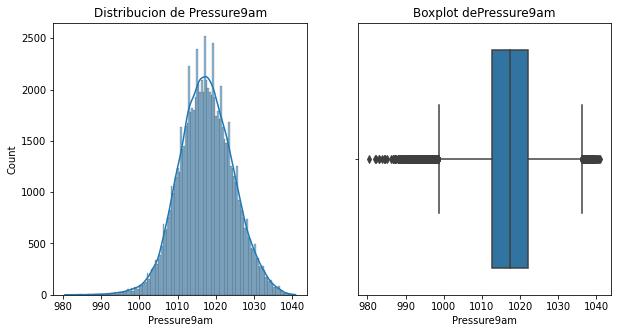

In [82]:
variable1 = "Pressure9am"

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable1}")
sns.histplot(data = df, x = f"{variable1}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable1}")
sns.boxplot(data = df, x = f"{variable1}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot dePressure3pm'}, xlabel='Pressure3pm'>

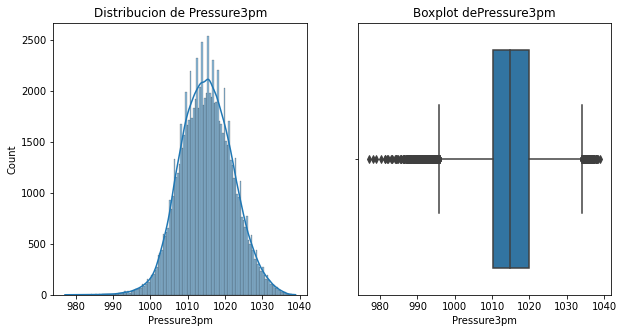

In [83]:
variable2 = "Pressure3pm"

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(f"Distribucion de {variable2}")
sns.histplot(data=df, x=f"{variable2}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot de{variable2}")
sns.boxplot(data=df, x=f"{variable2}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot dePressure_day'}, xlabel='Pressure_day'>

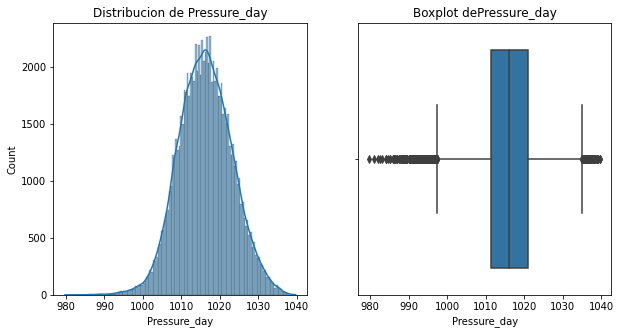

In [84]:
variable3 = "Pressure_day"

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(f"Distribucion de {variable3}")
sns.histplot(data=df, x=f"{variable3}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot de{variable3}")
sns.boxplot(data=df, x=f"{variable3}", ax=ax[1])

In [85]:
from sklearn.preprocessing import RobustScaler
print(f"Como los datos de las columas {variable1,variable2, variable3 } se distribuyen de manera normal y tienen outliers se utiliza RobustScaler")
robustscaler2 = RobustScaler()
variable1 = 'Pressure9am'
variable2 = 'Pressure3pm'
variable3 = 'Pressure_day'

df[variable1], df[variable2], df[variable3] =  robustscaler2.fit_transform(df[[variable1,variable2,variable3]]).T

df.head()

Como los datos de las columas ('Pressure9am', 'Pressure3pm', 'Pressure_day') se distribuyen de manera normal y tienen outliers se utiliza RobustScaler


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,0.71,-1.000000,-1.021277,-0.812500,16.9,21.8,No,0.000000,No,2008,12,1,8.0,-0.920635,-0.591837,19.35
2,Albury,0.530457,0.238532,0.000000,0.38,-0.733333,-1.031915,-0.645833,21.0,23.2,No,0.000000,No,2008,12,3,2.0,-0.841270,-1.102041,22.10
4,Albury,0.647208,0.844037,0.002695,0.82,-0.633333,-0.691489,-0.927083,17.8,29.7,No,0.000539,No,2008,12,5,7.5,-0.814815,-0.142857,23.75
6,Albury,0.565990,0.174312,0.000000,0.49,-1.100000,-0.819149,-0.697917,18.1,24.6,No,0.000000,No,2008,12,7,1.0,-0.761905,-1.102041,21.35
11,Albury,0.606599,-0.128440,0.005930,0.89,1.300000,-0.723404,-1.114583,15.9,17.0,Yes,0.042049,Yes,2008,12,12,8.0,-0.925926,1.183673,16.45


### Temp9am, Temp3pm y Temp_day

<AxesSubplot:title={'center':'Boxplot deTemp9am'}, xlabel='Temp9am'>

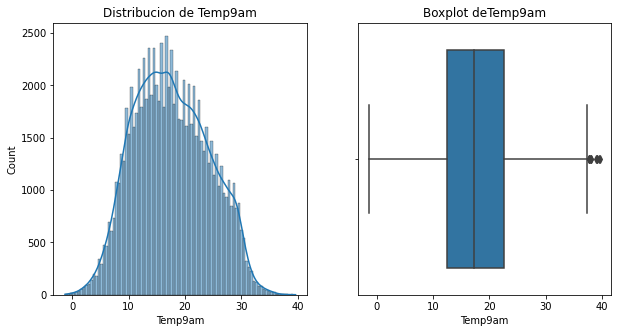

In [86]:
variable1 = "Temp9am"

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable1}")
sns.histplot(data = df, x = f"{variable1}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable1}")
sns.boxplot(data = df, x = f"{variable1}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot deTemp3pm'}, xlabel='Temp3pm'>

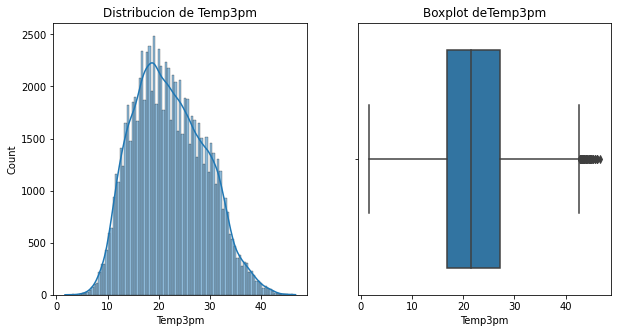

In [87]:
variable2 = "Temp3pm"

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(f"Distribucion de {variable2}")
sns.histplot(data=df, x=f"{variable2}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot de{variable2}")
sns.boxplot(data=df, x=f"{variable2}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot deTemp_day'}, xlabel='Temp_day'>

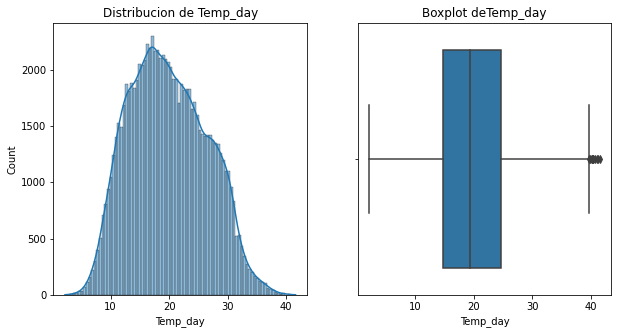

In [88]:
variable3 = "Temp_day"

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(f"Distribucion de {variable3}")
sns.histplot(data=df, x=f"{variable3}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot de{variable3}")
sns.boxplot(data=df, x=f"{variable3}", ax=ax[1])

In [89]:
from sklearn.preprocessing import RobustScaler

robustscaler2 = RobustScaler()
variable1 = 'Temp9am'
variable2 = 'Temp3pm'
variable3 = 'Temp_day'
print(f"Como los datos de las columas {variable1,variable2, variable3} no se distribuyen de manera normal se utiliza RobustScaler")
df[variable1], df[variable2], df[variable3] =  robustscaler2.fit_transform(df[[variable1,variable2,variable3]]).T

df.head()

Como los datos de las columas ('Temp9am', 'Temp3pm', 'Temp_day') no se distribuyen de manera normal se utiliza RobustScaler


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,0.71,-1.000000,-1.021277,-0.812500,-0.03,0.028846,No,0.000000,No,2008,12,1,8.0,-0.920635,-0.591837,-0.005
2,Albury,0.530457,0.238532,0.000000,0.38,-0.733333,-1.031915,-0.645833,0.38,0.163462,No,0.000000,No,2008,12,3,2.0,-0.841270,-1.102041,0.270
4,Albury,0.647208,0.844037,0.002695,0.82,-0.633333,-0.691489,-0.927083,0.06,0.788462,No,0.000539,No,2008,12,5,7.5,-0.814815,-0.142857,0.435
6,Albury,0.565990,0.174312,0.000000,0.49,-1.100000,-0.819149,-0.697917,0.09,0.298077,No,0.000000,No,2008,12,7,1.0,-0.761905,-1.102041,0.195
11,Albury,0.606599,-0.128440,0.005930,0.89,1.300000,-0.723404,-1.114583,-0.13,-0.432692,Yes,0.042049,Yes,2008,12,12,8.0,-0.925926,1.183673,-0.295


### Cloud_day

<AxesSubplot:title={'center':'Boxplot deCloud_day'}, xlabel='Cloud_day'>

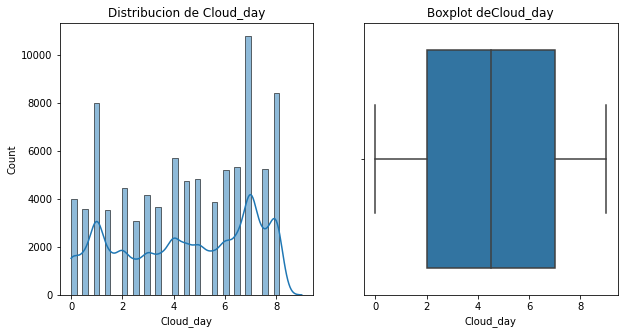

In [90]:
variable = "Cloud_day"
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [91]:
print(f"Como los datos de {variable} no se distribuyen de manera normal se utiliza MinMaxScaler")
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

df[variable]= minmaxscaler.fit_transform(df[[variable]])

df.head()

Como los datos de Cloud_day no se distribuyen de manera normal se utiliza MinMaxScaler


,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day,Cloud_day,Pressure_day,Humidity_day,Temp_day
0,Albury,0.543147,-0.018349,0.001617,0.71,-1.000000,-1.021277,-0.812500,-0.03,0.028846,No,0.000000,No,2008,12,1,0.888889,-0.920635,-0.591837,-0.005
2,Albury,0.530457,0.238532,0.000000,0.38,-0.733333,-1.031915,-0.645833,0.38,0.163462,No,0.000000,No,2008,12,3,0.222222,-0.841270,-1.102041,0.270
4,Albury,0.647208,0.844037,0.002695,0.82,-0.633333,-0.691489,-0.927083,0.06,0.788462,No,0.000539,No,2008,12,5,0.833333,-0.814815,-0.142857,0.435
6,Albury,0.565990,0.174312,0.000000,0.49,-1.100000,-0.819149,-0.697917,0.09,0.298077,No,0.000000,No,2008,12,7,0.111111,-0.761905,-1.102041,0.195
11,Albury,0.606599,-0.128440,0.005930,0.89,1.300000,-0.723404,-1.114583,-0.13,-0.432692,Yes,0.042049,Yes,2008,12,12,0.888889,-0.925926,1.183673,-0.295


## Enconding

In [92]:
categoricas = df.select_dtypes(exclude=['float64',"int32"]).columns
print("Hacer un escalado a la variables:")
for variable in categoricas:
    print(f"\t -{variable}")

Hacer un escalado a la variables:
	 -Location
	 -RainToday
	 -RainTomorrow
	 -Year
	 -Month
	 -Day


### RainTomorrow(Target)

In [93]:
from sklearn.preprocessing import LabelEncoder

df['RainTomorrow'] = LabelEncoder().fit_transform(df['RainTomorrow'])
df.head()
print("Cambiamos el No por 0 y el Yes a 1 de la columna RainTomorrow")

Cambiamos el No por 0 y el Yes a 1 de la columna RainTomorrow


In [94]:
df["RainTomorrow"].value_counts()

0    68186
1    20473
Name: RainTomorrow, dtype: int64

In [95]:
df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

RainTomorrow,0,1
Location,,
Albany,2076.0,889.0
Albury,1203.0,539.0
AliceSprings,2531.0,241.0
Ballarat,1928.0,744.0
Bendigo,1880.0,528.0
Brisbane,2452.0,709.0
Cairns,1938.0,931.0
Canberra,2097.0,544.0
Cobar,2358.0,377.0


### Location

In [96]:
print(f"Los tipos de datos que hay en la columna son:\n{df.Location.value_counts()}")

Los tipos de datos que hay en la columna son:
Perth               3193
Darwin              3192
Brisbane            3161
MelbourneAirport    3009
PerthAirport        3009
SydneyAirport       3004
Watsonia            2999
MountGambier        2981
Mildura             2976
Albany              2965
NorfolkIsland       2946
Townsville          2909
Nuriootpa           2891
Cairns              2869
WaggaWagga          2857
Sale                2780
AliceSprings        2772
Sydney              2767
Portland            2737
Cobar               2735
Woomera             2697
Ballarat            2672
Canberra            2641
Moree               2544
Bendigo             2408
CoffsHarbour        2349
Williamtown         2218
Melbourne           2038
Hobart              2028
PearceRAAF          2006
Wollongong          1761
Albury              1742
Katherine           1536
Richmond             767
Uluru                499
Launceston             1
Name: Location, dtype: int64


In [97]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

var = 'Location'

ohe.fit(df[[var]])

display(ohe.categories_)

display(ohe.get_feature_names_out())

variable_encoded = ohe.transform(df[[var]])

df[ohe.get_feature_names_out()] = variable_encoded

df.drop(columns = var, inplace = True)

print(f"Como {var} es una variable multicategorica, creo una columna binaria para cada categoria")

[array(['Albany', 'Albury', 'AliceSprings', 'Ballarat', 'Bendigo',
        'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour',
        'Darwin', 'Hobart', 'Katherine', 'Launceston', 'Melbourne',
        'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier',
        'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Perth',
        'PerthAirport', 'Portland', 'Richmond', 'Sale', 'Sydney',
        'SydneyAirport', 'Townsville', 'Uluru', 'WaggaWagga', 'Watsonia',
        'Williamtown', 'Wollongong', 'Woomera'], dtype=object)]

array(['Location_Albany', 'Location_Albury', 'Location_AliceSprings',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Darwin', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Uluru', 'Location_WaggaWagga',
       'Location_Watsonia', 'Location_Williamtown', 'Location_Wollongong',
       'Location_Woomera'], dtype=object)

Como Location es una variable multicategorica, creo una columna binaria para cada categoria


### RainToday

In [98]:
print(f"Los tipos de datos que hay en la columna son:\n{df.RainToday.value_counts()}")

Los tipos de datos que hay en la columna son:
No     68215
Yes    20444
Name: RainToday, dtype: int64


In [99]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder(sparse=False, drop='if_binary', categories=[['No', 'Yes']])

var = 'RainToday'
df[var] =hot_encoder.fit_transform(df[[var]])
print(f"Como {var} es una variable binaria, se utiliza onehotencoder modifica la columna escribiendo 0 donde es No y 1 donde es Yes")

Como RainToday es una variable binaria, se utiliza onehotencoder modifica la columna escribiendo 0 donde es No y 1 donde es Yes


### Year, Month, Day

In [100]:
df = df.drop(columns = ["Year","Month","Day"])

Elimino las columnas porque no son necesarias para el modelo

## Modelado
Para mi modelo se utiliza Regresion logistica ya que mi objetivo es predecir si llueve o no mañana y con cuantas probabilidades se puede asegurar si llueve.

La columna RISK_MM es cuantos mililitros se cree que van a caer al dia siguiente. Por eso, creo yo que es mejor sacarlo porque sino el test va a ser sesgado

In [101]:
features_CON_RISK = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Cloud_day', 'Pressure_day', 'Humidity_day', 'Temp_day', 'Location_Albury', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Wollongong','RISK_MM']

In [102]:
X_con_riskMM = df[features_CON_RISK]
y_con_riskMM = df['RainTomorrow']

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_con_riskMM, y_con_riskMM, test_size=0.3, random_state=10)

Entrenamos al modelo por primera vez siendo la parte del dataset que se utiliza para entrenarlo un 60% de los datos.

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
primer_score = model.score(X_test, y_test)
print('Accuracy con RISK_MM:', primer_score)

Accuracy con RISK_MM: 0.8900669223249869


In [105]:
features_SIN_RISK = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Cloud_day', 'Pressure_day', 'Humidity_day', 'Temp_day', 'Location_Albury', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Wollongong']

X = df[features_SIN_RISK]
y = df['RainTomorrow']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [107]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
segundo_score =  model.score(X_test, y_test)
print('Accuracy sin la variable RISK_MM: ', segundo_score)

Accuracy sin la variable RISK_MM:  0.8349123994285285


In [108]:
def score(scoreviejo, scorenuevo):
    if scorenuevo>scoreviejo:
        print(f"El nuevo score es mayor, es decir que el modelo ha mejorado. Este ha mejorado un {(scorenuevo - scoreviejo).round(5)}")
    else:
        print(f"El nuevo score es menor , es decir que el modelo ha empeorado. Este ha empeorado un {(scorenuevo - scoreviejo).round(5)}")

In [109]:
score(primer_score,segundo_score)

El nuevo score es menor , es decir que el modelo ha empeorado. Este ha empeorado un -0.05515


Como podemos observar, varia cuando esta la columna RISK_MM

Ahora lo que hacemos es probando estratificar la variable target, dependiente. Porque queremos que esta siempre tenga la misma proporción en todas las pruebas que se hagan

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=10)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
tercer_score = model.score(X_test, y_test)
print('Nuevo accuracy con stratify: ', tercer_score)

Nuevo accuracy con stratify:  0.8365666591473043


In [111]:
score(segundo_score,tercer_score)

El nuevo score es mayor, es decir que el modelo ha mejorado. Este ha mejorado un 0.00165


In [112]:
from sklearn.model_selection import cross_validate
df_reduced = df.sample(n=500, random_state=1)
X_reduced =df_reduced.drop(columns=['RainTomorrow'])
y_reduced = df_reduced['RainTomorrow']
# 5-Fold Cross validate model
cv_results = cross_validate(LogisticRegression(max_iter=1000), X_reduced, y_reduced, cv=5)

# Mean of accuracies
reduced_training_accuracy = cv_results['test_score'].mean()

reduced_training_accuracy

0.844

El accuracy es igual que el que no es reducido.
El accuracy es bueno ya que es un numero alto

Miro cuales son las variables mas debiles

In [113]:
from sklearn.inspection import permutation_importance

model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X,y)

permutation_score = permutation_importance(model, X, y, n_repeats=100)

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])
importance_df

,feature,feature_importance
0,MinTemp,-0.00008
1,MaxTemp,0.001064
2,Rainfall,0.00042
3,Humidity9am,0.001107
4,Humidity3pm,0.081029
5,Pressure9am,0.039543
6,Pressure3pm,0.102723
7,Temp9am,0.000011
8,Temp3pm,0.006447
9,RainToday,0.00491


In [114]:
# Defino un umbral de score
threshold = 0.02

weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values


print(f"Seleccionamos un umbral para el score y almacenamos las variables debiles que son:")
weak_features

Seleccionamos un umbral para el score y almacenamos las variables debiles que son:


array(['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Temp9am',
       'Temp3pm', 'RainToday', 'Cloud_day', 'Pressure_day',
       'Humidity_day', 'Temp_day', 'Location_Albury', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Wollongong'], dtype=object)

Usando las variables reducidas creamos un nuevo CrossValidation y almacenamos el score para compararlo con el modelo base

In [115]:
from sklearn.model_selection import cross_val_score
X_strong_features = df.drop(columns = list(weak_features) + ["RainTomorrow"])

print(f"Las variables fuertes son {list(X_strong_features.columns)}\n")

scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), X_strong_features, y, cv = 10)

cuarto_score = scores.mean()

print(f"Antes de remover las variables el accurracy es {round(tercer_score,4)}")

print(f"El modelo entrenado con las variables fuertes dan un accuracy de {round(cuarto_score, 4)}")
#hay qe reiniciar todo

Las variables fuertes son ['Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RISK_MM', 'Location_Albany', 'Location_AliceSprings', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_Townsville', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown', 'Location_Woomera']

Antes de remover las variables el accurracy es 0.8366
El modelo entrenado con las variables fuertes dan un accuracy de 0.6973


In [116]:
score(tercer_score,cuarto_score)

El nuevo score es menor , es decir que el modelo ha empeorado. Este ha empeorado un -0.13927


#### Matriz de confusion

In [117]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print(confusion)
print('True Positive: ', confusion[0][0], 'False Negative: ', confusion[0][1])
print('False Positive: ', confusion[1][0], 'True Negative: ', confusion[1][1])
TP = confusion[0,0]
TN = confusion[1,1]
FP = confusion[1,0]
FN = confusion[0,1]
print((TP + TN)/(TP+TN+FP+FN))

[[19274  1182]
 [ 3165  2977]]
True Positive:  19274 False Negative:  1182
False Positive:  3165 True Negative:  2977
0.8365666591473043


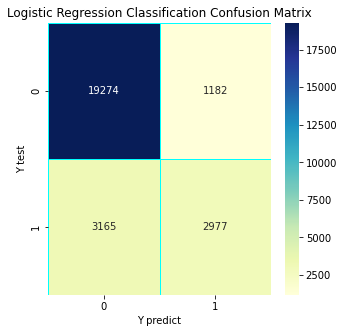

 -True Positive:  19274 de los casos fueron predichos como que no iba a llover y efectivamente no llovió
 -False Negative:  1182 de los casos en los cuales fueron predichos como que no iba a llover y efectivamente si llovio
 -False Positive:  3165 de los casos en los cuales fueron predichos como que iba a llover y efectivamente no llovio
 -True Negative:  2977 de los casos en los cuales fueron predichos como que iba a llover y efectivamente llovio


In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


print(' -True Positive: ', confusion[0][0],'de los casos fueron predichos como que no iba a llover y efectivamente no llovió\n -False Negative: ', confusion[0][1],'de los casos en los cuales fueron predichos como que no iba a llover y efectivamente si llovio\n -False Positive: ', confusion[1][0],'de los casos en los cuales fueron predichos como que iba a llover y efectivamente no llovio\n -True Negative: ', confusion[1][1],'de los casos en los cuales fueron predichos como que iba a llover y efectivamente llovio')

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     20456
           1       0.72      0.48      0.58      6142

    accuracy                           0.84     26598
   macro avg       0.79      0.71      0.74     26598
weighted avg       0.83      0.84      0.82     26598



In [120]:
predict_rain = model.predict(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm','Humidity_day','Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday','Cloud_day', 'Pressure_day', 'Temp_day', 'Location_Albury', 'Location_Sydney','Location_SydneyAirport', 'Location_Wollongong']])

predict_rain = list(map(round, predict_rain))

predict_rain

c:\users\magda\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


### Precision

In [121]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))

[0.85895093 0.71579707]


Los datos son bastantes utiles y es un buen modelo que predice bien los los que no llueven y si llueven.
 - <font color='green'>**0.8589**</font>: Del total de los positivos, un 0.8589 los predijo bien
 - <font color='green'>**0.7158**</font>:Del total de predecidos negativos, un 0,74 los predijo bien

### Recall

In [122]:
from sklearn.metrics import recall_score

recall_score(df.RainTomorrow, predict_rain, average=None)

array([0.91042149, 0.49308846])

De los que observas positivos cuantos fueron predecidos positivos cuan completos son los datos
  - <font color='green'>**0.941:**</font> Cuantos predijo bien positivos(no llover) del total de positivos. Es el porcentaje de los dias que no llovieron y se predijo que no llovieron
- <font color='green'>**0.483:**</font> Cuantos predijo bien negativos del total de negativos Un 0,69 son los que predijo correctamente que si sobrevieron

## Predecir

In [123]:
from sklearn.linear_model import LogisticRegression


X = df.drop(columns=list(weak_features) + ["RainTomorrow"] +["RISK_MM"])
y = df["RainTomorrow"]
model_pred = LogisticRegression(max_iter=1000)
model_pred.fit(X, y)
X_new = pd.DataFrame({'Humidity3pm': [1.5], 'Pressure9am': [-1.6], 'Pressure3pm':[-1.0], 'Location_Albany':[0], 'Location_AliceSprings': [0], 'Location_Ballarat': [0], 'Location_Bendigo':[0],'Location_Brisbane':[0], 'Location_Cairns':[0], 'Location_Canberra':[0],'Location_Cobar': [0], 'Location_CoffsHarbour': [0], 'Location_Darwin':[0], 'Location_Hobart':[0], 'Location_Katherine':[0], 'Location_Launceston':[0], 'Location_Melbourne':[0], 'Location_MelbourneAirport':[0], 'Location_Mildura':[0],'Location_Moree':[0], 'Location_MountGambier':[0], 'Location_NorfolkIsland':[0], 'Location_Nuriootpa':[0], 'Location_PearceRAAF':[0], 'Location_Perth':[0], 'Location_PerthAirport':[1], 'Location_Portland':[0], 'Location_Richmond':[0], 'Location_Sale':[0], 'Location_Townsville':[0], 'Location_Uluru':[0], 'Location_WaggaWagga':[0], 'Location_Watsonia':[0], 'Location_Williamtown':[0], 'Location_Woomera':[0]})
prediction = model_pred.predict(X_new)[0]
if prediction ==1:
    print("Mañana llueve")
else:
    print("Mañana no llueve")

Mañana llueve


En el caso que, la ubicacion sea el Aeropuerto de Perth, haya una Humedad a las 3 pm de 1.5, la presion a las 9 am sea de -1,6 y a las 3 pm sea de -1, entonces al dia siguiente llueve
Si tiene sentido ya que la presion en el ambiente es un factor clave para saber si va a llover a corto plazo, lo mismo sucede con la humedad, cuanta mas humedad hay, mayor es la probabilidad de que llueva

### Cargar csv

In [124]:
df.to_csv("AUS_precipitation.csv", index=False)

##Conclusion Final

In [125]:
df.groupby("RainTomorrow").agg(
    presion_atmosferica =  ('Pressure_day', 'median')
)

,presion_atmosferica
RainTomorrow,
0,0.089947
1,-0.333333


Recordando cual era la hipotesis, yo queria saber si habia una correlacion entre la presion atmosferica y si al dia siguiente lloveria. Se puede observar en este groupby como esto se cumple,siendo que si la presion atmosferica es mayor a 0, entonces no llueve, pero en el caso de que la presion atmosferica sea menor a 0, entonces hay probabilidades de que va a llover